In [1]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
path = r"D:\CNTT\py_for_da\crawl_data_analyst\tiki\diengiadung"
os.listdir(path)


['.ipynb_checkpoints',
 'dodungnhabep',
 'thietbigiadinh',
 'tk_diengiadung_all.ipynb',
 'tk_dodungnhabep_all_ed.csv',
 'tk_thietbigiadinh_all_ed.csv']

In [3]:
frames = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + '\\' + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)

df_all = result
df_all.to_csv("tk_diengiadung_all.csv", index="False")

In [5]:
df_all.head()

,Unnamed: 0,title,price,link_item,discount,sales,category,revenue
0,0,Máy xay cafe 600N,699000,https://tiki.vn/may-xay-cafe-600n-p23829470.ht...,-2%,199.0,dodungnhabep,1.391010e+08
1,1,Máy trộn bột GOURMETMAXX 5L 1500W - Thương hiệ...,2399000,https://tiki.vn/may-tron-bot-gourmetmaxx-5l-15...,-45%,25.0,dodungnhabep,5.997500e+07
2,2,Nồi Chiên Không Dầu Magic A-802 (4.6 Lít) Đen ...,1090000,https://tiki.vn/noi-chien-khong-dau-magic-a-80...,-46%,1100.0,dodungnhabep,1.199000e+09
3,3,Máy Đánh Trứng Daewoo DWHM-354 (150W) - Hàng c...,216000,https://tiki.vn/may-danh-trung-daewoo-dwhm-354...,NaN,1200.0,dodungnhabep,2.592000e+08
4,4,Bếp Đôi Điện Từ Hồng Ngoại Sunhouse SHB9104MT ...,2940000,https://tiki.vn/bep-doi-dien-tu-hong-ngoai-sun...,-6%,526.0,dodungnhabep,1.546440e+09


In [6]:
total_sales_by_category = df_all.groupby('category')['revenue'].sum()
total_sales = df_all['revenue'].sum()
print(total_sales_by_category)
print(total_sales)

category
dodungnhabep    2.845005e+11
thietbij        1.425363e+11
Name: revenue, dtype: float64
427036827008.0


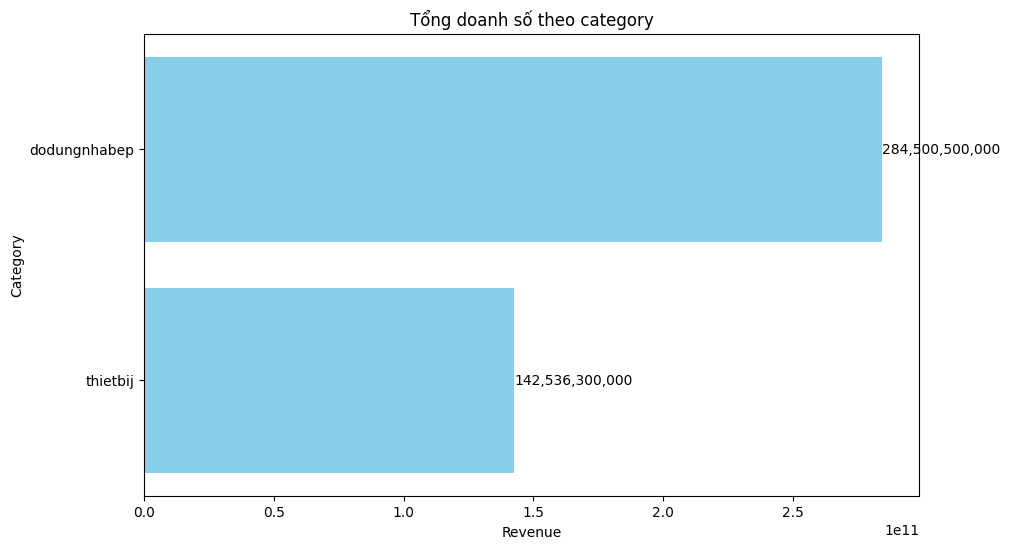

In [7]:
data = {'dodungnhabep': 2.845005e+11,
        'thietbij': 1.425363e+11}
revenue_series = pd.Series(data)

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(10, 6))
revenue_series.sort_values().plot(kind='barh', color='skyblue')

# Hiển thị giá trị doanh số trên từng cột
for bar in plt.barh(revenue_series.sort_values().index, revenue_series.sort_values(), color='skyblue'):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.0f}', 
             va='center', ha='left', color='black')

plt.title('Tổng doanh số theo category')
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.show()
